Unlike previous schedulers that adjust the LR based on epochs, this scheduler monitors a specific metric (e.g., validation loss) and reduces the LR when no improvement is detected.

🔸 Key Idea: If the model stops improving for a while, we reduce the learning rate to help it converge better.

🔸 Why is this useful?

Avoids reducing the LR too soon like other schedulers.
Reduces LR only when necessary, preventing unnecessary slowdowns.
Helps escape plateaus where the model gets stuck at a certain loss value.

In [42]:
import torch

import numpy as np

import torch.nn as nn

import torch.optim as optim

import matplotlib.pyplot as plt

In [43]:
# Dummy Model

model = torch.nn.Linear(10,1)

optimizer = optim.Adam(model.parameters(), lr=0.1)

🔹 Parameters

mode → "min" (for loss) or "max" (for accuracy).

factor → The factor by which the LR is reduced (e.g., 0.1 means LR is divided by 10).

patience → Number of epochs to wait before reducing LR if no improvement is seen.

threshold → Minimum change to be considered an improvement.

cooldown → Number of epochs to wait after reducing LR before resuming normal operation.

min_lr → The lowest possible LR.

In [44]:
# Define ReduceLROnPlateau

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                 mode='min',
                                                 factor=0.5,
                                                 patience=5,
                                                 threshold=0.01,
                                                 cooldown=2,
                                                 min_lr=1e-6)


In [45]:
# Simulating a loss trend (e.g., initially decreasing, then a plateau)

losses = [0.5 / (epoch + 1) for epoch in range(20)]

losses[10:] = [0.05] * 10 # Simulating a plateau at epoch 10

Epoch 1, loss: 0.5000, LR: 0.100000
Epoch 2, loss: 0.2500, LR: 0.100000
Epoch 3, loss: 0.1667, LR: 0.100000
Epoch 4, loss: 0.1250, LR: 0.100000
Epoch 5, loss: 0.1000, LR: 0.100000
Epoch 6, loss: 0.0833, LR: 0.100000
Epoch 7, loss: 0.0714, LR: 0.100000
Epoch 8, loss: 0.0625, LR: 0.100000
Epoch 9, loss: 0.0556, LR: 0.100000
Epoch 10, loss: 0.0500, LR: 0.100000
Epoch 11, loss: 0.0500, LR: 0.100000
Epoch 12, loss: 0.0500, LR: 0.100000
Epoch 13, loss: 0.0500, LR: 0.100000
Epoch 14, loss: 0.0500, LR: 0.100000
Epoch 15, loss: 0.0500, LR: 0.100000
Epoch 16, loss: 0.0500, LR: 0.010000
Epoch 17, loss: 0.0500, LR: 0.010000
Epoch 18, loss: 0.0500, LR: 0.010000
Epoch 19, loss: 0.0500, LR: 0.010000
Epoch 20, loss: 0.0500, LR: 0.010000


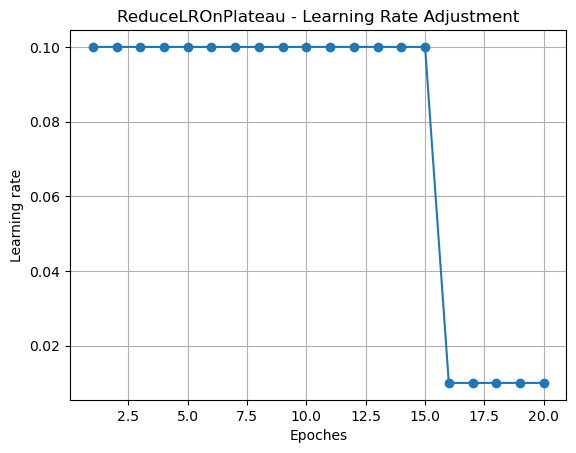

In [46]:
lrs = []

# Simulate training loop

for epoch , loss in enumerate (losses):

    optimizer.step() # Dummy optimizer step

    scheduler.step(loss) # Reduce LR based on loss

    # Store LR for visualization

    lrs.append(optimizer.param_groups[0]['lr'])

    print(f'Epoch {epoch +1}, loss: {loss:.4f}, LR: {lrs[-1]:6f}')


# Plot Learning Rate Changes

plt.plot(range(1, len(lrs)+1 ), lrs, marker='o', linestyle='-')

plt.xlabel('Epoches')

plt.ylabel('Learning rate')

plt.title("ReduceLROnPlateau - Learning Rate Adjustment")

plt.grid(True)

plt.show()

Initially, the LR stays constant as long as the loss is improving.

Once loss stagnates (plateau detected at epoch 10), the LR starts decreasing based on the factor.

The scheduler waits for patience epochs before reducing the LR.

Cooldown period prevents it from reducing LR too frequently.

The LR stops decreasing once it reaches min_lr.

✅ Best for scenarios where training loss fluctuates instead of steadily decreasing.

✅ More adaptive than fixed schedules like StepLR or Exponential Decay.

✅ Works well in real-world models when you don’t know the best LR decay timing.